In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imgviz
import cv2
from dotenv import load_dotenv

In [41]:
load_dotenv()
ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML075_KhinChaw


In [43]:
# -----------------------------
# Set dataset paths
# -----------------------------
dataset_dir = "/Users/khinchaw/Documents/GitHub/Practical-ML-by-WAI/8_final_project/KhinChaw/dataset/cat_and_dog_dataset/output_voc_dataset"
mask_dir = os.path.join(dataset_dir, "SegmentationClassNpy")
img_dir = os.path.join(dataset_dir, "JPEGImages")
class_file = "/Users/khinchaw/Documents/GitHub/Practical-ML-by-WAI/8_final_project/KhinChaw/dataset/cat_and_dog_dataset/class_names.txt"

In [44]:
# Load class names
with open(class_file) as f:
    class_names = [line.strip() for line in f.readlines()]

print("Classes found:", class_names)


Classes found: ['__ignore__', '_background_', 'dog', 'cat']


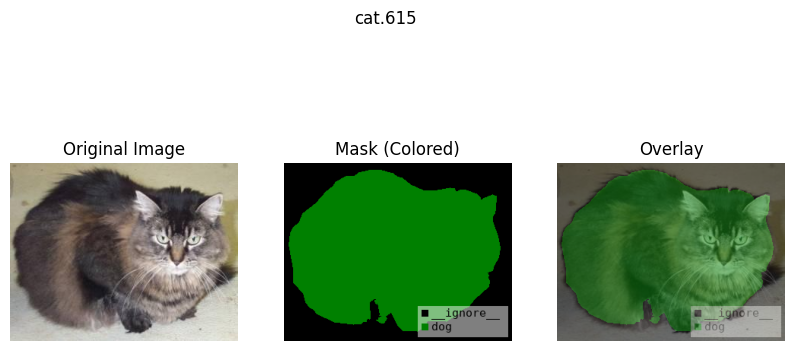

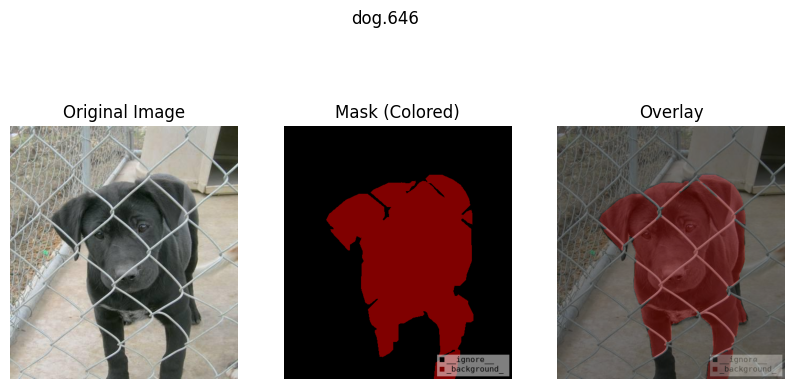

In [47]:
import random
# -----------------------------
# Load all mask files
# -----------------------------
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith(".npy")])

# Separate cats and dogs based on filename
cat_files = [f for f in mask_files if "cat" in f.lower()]
dog_files = [f for f in mask_files if "dog" in f.lower()]

# Pick 1 random cat and 1 random dog
cat_file = random.choice(cat_files)
dog_file = random.choice(dog_files)

def show_image_with_mask(mask_file):
    # Load mask
    mask_path = os.path.join(mask_dir, mask_file)
    mask = np.load(mask_path)

    # Load corresponding image
    base_name = os.path.splitext(mask_file)[0]
    img_path = os.path.join(img_dir, base_name + ".jpg")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert mask to color
    mask_color = imgviz.label2rgb(label=mask, label_names=class_names, font_size=15)

    # Overlay
    overlay = (0.5 * img + 0.5 * mask_color).astype(np.uint8)

    # Display
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_color)
    plt.title("Mask (Colored)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

    plt.suptitle(base_name)
    plt.show()

# Show random cat and dog
show_image_with_mask(cat_file)
show_image_with_mask(dog_file)